# Часть 1

## Этап 1

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('uplift_fp_data.csv')

print('Размер датасета:', df.shape)
df.head()

Размер датасета: (64000, 10)


,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
0,10,1,142.44,1,0,1,0,1,1,0
1,6,2,329.08,1,1,2,1,2,0,0
2,7,1,180.65,0,1,1,1,2,1,0
3,9,4,675.83,1,0,2,1,2,0,0
4,2,0,45.34,1,0,0,0,2,1,0


In [8]:
df.info()
print('\nКоличество пропусков по столбцам:')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  int64  
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  int64  
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  int64  
 8   treatment        64000 non-null  int64  
 9   target           64000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.9 MB

Количество пропусков по столбцам:
recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
treatment          0
target             0
dtype: int64


In [ ]:
missing_percent = df.isna().mean() * 100
print(missing_percent[missing_percent > 0])

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode())
df.isna().sum().sum()

duplicates = df.duplicated().sum()
print(f'Количество дубликатов: {duplicates}')

if duplicates > 0:
    df = df.drop_duplicates().reset_index(drop=True)

print('Размер датасета после очистки:', df.shape)
df.describe()


Series([], dtype: float64)
Количество дубликатов: 7015
Размер датасета после очистки: (56985, 10)


,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
count,56985.000000,56985.000000,56985.000000,56985.000000,56985.000000,56985.000000,56985.000000,56985.000000,56985.000000,56985.000000
mean,5.657401,1.663859,268.117295,0.556901,0.556252,0.751636,0.502641,1.296832,0.336211,0.155199
std,3.502217,1.541509,259.796627,0.496756,0.496830,0.700899,0.499997,0.693602,0.472416,0.362097
min,1.000000,0.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,90.690000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,5.000000,1.000000,185.140000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,9.000000,3.000000,354.140000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
max,12.000000,6.000000,3345.930000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000


## Этап 2

### EDA


treatment
0    0.663789
1    0.336211
Name: proportion, dtype: float64


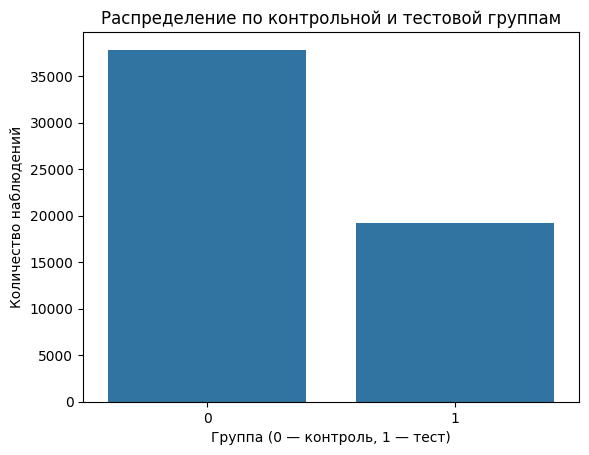

/tmp/ipykernel_11192/3139888756.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='treatment', y='target', data=df, ci=None)


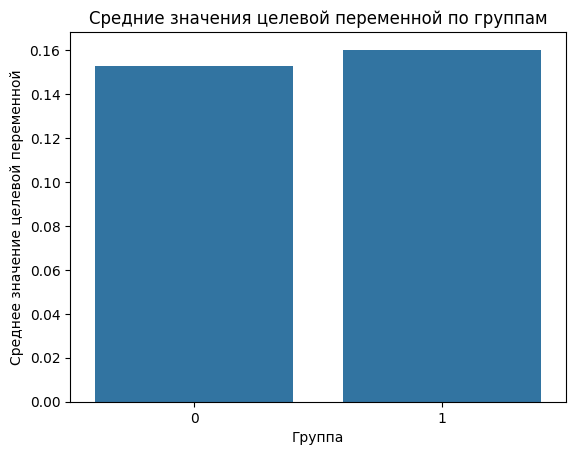

/home/mle-user/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37826.
  res = hypotest_fun_out(*samples, **kwds)
/home/mle-user/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19159.
  res = hypotest_fun_out(*samples, **kwds)


p-value теста Шапиро для контрольной группы: 0.0000
p-value теста Шапиро для тестовой группы: 0.0000
Выбран тест: Манна–Уитни
Статистика: 359631782.5000, p-value: 0.0193
Различия между контрольной и тестовой группами статистически значимы (p < 0.05)


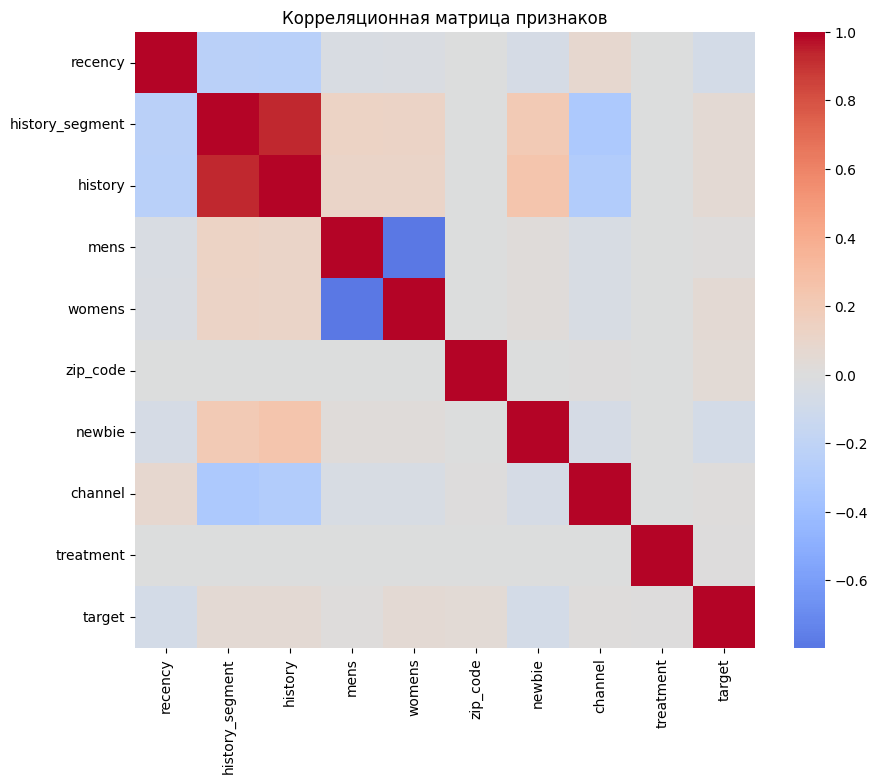

Корреляция признаков с целевой переменной:
target             1.000000
history_segment    0.051744
history            0.049328
womens             0.048823
zip_code           0.039588
channel            0.014381
mens               0.010416
treatment          0.009802
recency           -0.069150
newbie            -0.070114
Name: target, dtype: float64


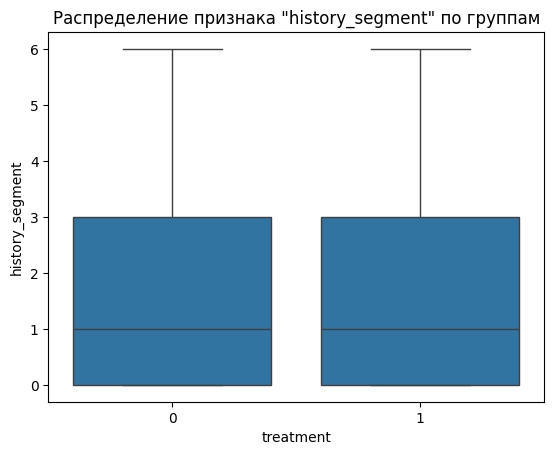

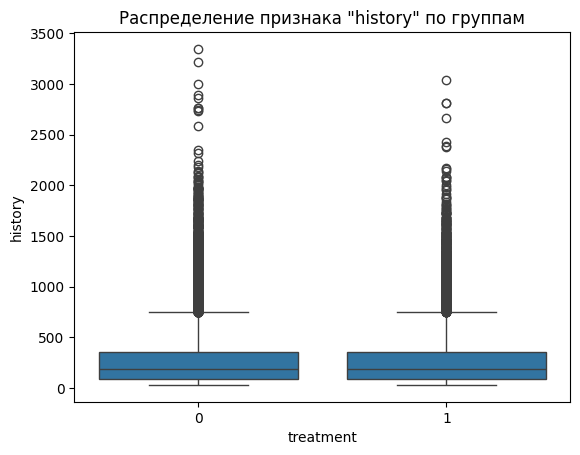

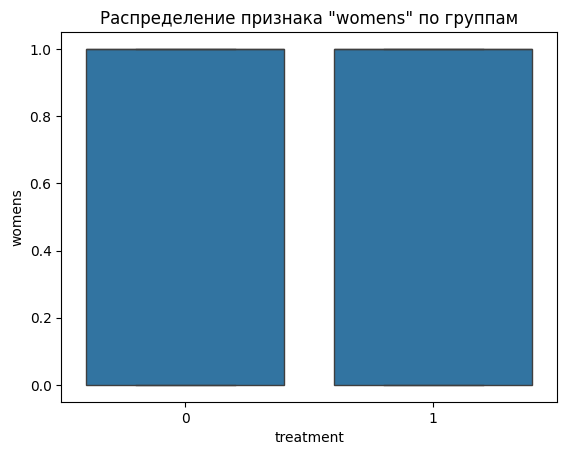

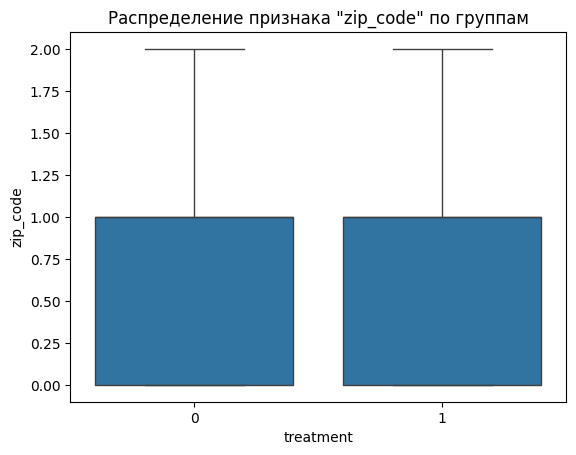

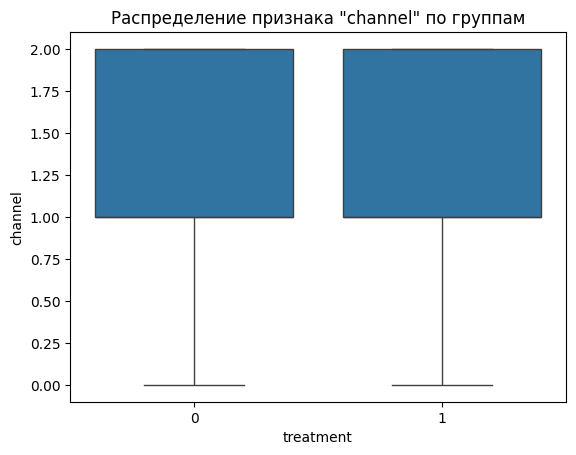

In [10]:
print(df['treatment'].value_counts(normalize=True))
sns.countplot(x='treatment', data=df)
plt.title('Распределение по контрольной и тестовой группам')
plt.xlabel('Группа (0 — контроль, 1 — тест)')
plt.ylabel('Количество наблюдений')
plt.show()

sns.barplot(x='treatment', y='target', data=df, ci=None)
plt.title('Средние значения целевой переменной по группам')
plt.xlabel('Группа')
plt.ylabel('Среднее значение целевой переменной')
plt.show()

from scipy import stats

control = df[df['treatment'] == 0]['target']
test = df[df['treatment'] == 1]['target']

p_control = stats.shapiro(control).pvalue
p_test = stats.shapiro(test).pvalue
print(f"p-value теста Шапиро для контрольной группы: {p_control:.4f}")
print(f"p-value теста Шапиро для тестовой группы: {p_test:.4f}")

if p_control < 0.05 or p_test < 0.05:
    test_stat, p_val = stats.mannwhitneyu(control, test, alternative='two-sided')
    test_name = 'Манна–Уитни'
else:
    test_stat, p_val = stats.ttest_ind(control, test, equal_var=False)
    test_name = 't-тест'

print(f'Выбран тест: {test_name}')
print(f'Статистика: {test_stat:.4f}, p-value: {p_val:.4f}')

if p_val < 0.05:
    print('Различия между контрольной и тестовой группами статистически значимы (p < 0.05)')
else:
    print('Различий между группами не обнаружено (p >= 0.05)')

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица признаков')
plt.show()

corr_with_target = corr_matrix['target'].sort_values(ascending=False)
print('Корреляция признаков с целевой переменной:')
print(corr_with_target)

top_features = corr_with_target.index[1:6]
for col in top_features:
    sns.boxplot(x='treatment', y=col, data=df)
    plt.title(f'Распределение признака "{col}" по группам')
    plt.show()


Сделайте вывод на основе EDA в данной ячейке

# Этап 2

### Проверка на статистическую значимость

Обоснуйте выбор статистического теста в данной ячейке

In [11]:
from scipy import stats

control = df[df['treatment'] == 0]['target']
test = df[df['treatment'] == 1]['target']

p_control = stats.shapiro(control).pvalue
p_test = stats.shapiro(test).pvalue
print(f"p-value Шапиро контроль: {p_control:.4f}")
print(f"p-value Шапиро тест: {p_test:.4f}")

if p_control < 0.05 or p_test < 0.05:
    test_name = 'Манна–Уитни'
    stat, p_val = stats.mannwhitneyu(control, test)
else:
    test_name = 't-тест'
    stat, p_val = stats.ttest_ind(control, test, equal_var=False)

print(f"Выбран тест: {test_name}")
print(f"Статистика = {stat:.4f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print('Значимы')
else:
    print('Не значимы')


/home/mle-user/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37826.
  res = hypotest_fun_out(*samples, **kwds)
/home/mle-user/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19159.
  res = hypotest_fun_out(*samples, **kwds)


p-value Шапиро контроль: 0.0000
p-value Шапиро тест: 0.0000
Выбран тест: Манна–Уитни
Статистика = 359631782.5000, p-value = 0.0193
Значимы


## Построение корреляций

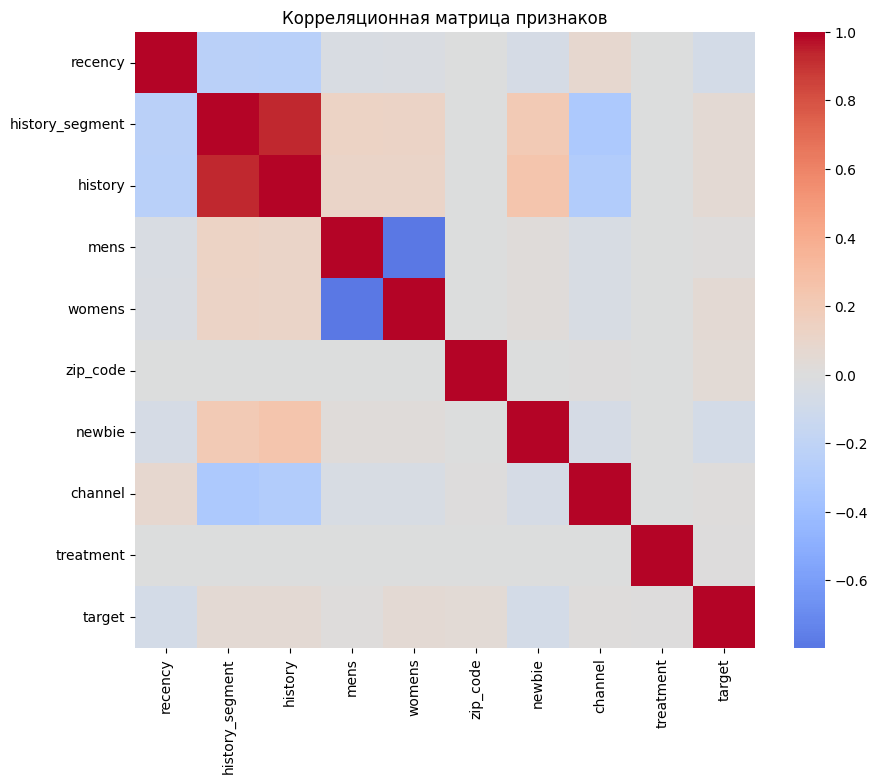

Корреляция признаков с целевой переменной:
target             1.000000
history_segment    0.051744
history            0.049328
womens             0.048823
zip_code           0.039588
channel            0.014381
mens               0.010416
treatment          0.009802
recency           -0.069150
newbie            -0.070114
Name: target, dtype: float64


In [12]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица признаков')
plt.show()

corr_with_target = corr_matrix['target'].sort_values(ascending=False)
print('Корреляция признаков с целевой переменной:')
print(corr_with_target)


Сделайте вывод о корреляциях признаков друг с другом и таргетом в этой ячейке

## Этап 3

Обоснуйте выбор конкретной uplift модели в данной ячейке

### Советы по обучению и инференсу моделей
1. Некоторые uplift модели из библиотеки `causalml` будут требовать категориальные значения воздействия. Для этого используйте маппинг
#### Пример использования маппинга
```python
treatment_mapping = {
    0: 'control',
    1: 'treatment'
}
treatment_train_mapped = treatment_train.map(treatment_mapping)
treatment_test_mapped = treatment_test.map(treatment_mapping)
```

2. При вызове метода `.predict` и получения метрик для тестовой выборки не забывайте применять к прогнозам метод `squeeze()`, чтобы преобразовать многомерный массив в одномерный, что поможет получить адекватные метрики.

3. Для воспроизводимости результатов и объективной оценки не забывайте применять `random_state=42` для моделей, а также при разделении выборки

Я выбрал T-learner т.к.:
Бинарный таргет
Мало признаков
Группы хорошо сбалансированы

### Разбиение выборки на тренировочную и тестовую

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
features = df.drop(columns=['target', 'treatment'])
target = df['target']
treatment = df['treatment']

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df[['treatment', 'target']],
    random_state=42
)

### Обучение выбранного бейзлайна

In [ ]:
from lightgbm import LGBMClassifier

train_treat = train_df[train_df['treatment'] == 1]
train_ctrl = train_df[train_df['treatment'] == 0]

X_treat = train_treat.drop(columns=['target', 'treatment'])
y_treat = train_treat['target']

X_ctrl = train_ctrl.drop(columns=['target', 'treatment'])
y_ctrl = train_ctrl['target']

model_treat = LGBMClassifier(random_state=42)
model_ctrl = LGBMClassifier(random_state=42)

model_treat.fit(X_treat, y_treat)
model_ctrl.fit(X_ctrl, y_ctrl)

[LightGBM] [Info] Number of positive: 2455, number of negative: 12872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 15327, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160175 -> initscore=-1.656928
[LightGBM] [Info] Start training from score -1.656928


[LightGBM] [Info] Number of positive: 4620, number of negative: 25641
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 30261, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152672 -> initscore=-1.713798
[LightGBM] [Info] Start training from score -1.713798


LGBMClassifier(random_state=42)

### Расчет метрик для выбранного бейзлайна на тестовой выборке

In [ ]:
from sklift.metrics import uplift_at_k, uplift_auc_score, qini_auc_score

X_test = test_df.drop(columns=['target', 'treatment'])
y_test = test_df['target']
treat_test = test_df['treatment']

pred_treat = model_treat.predict_proba(X_test)[:, 1]
pred_ctrl = model_ctrl.predict_proba(X_test)[:, 1]

uplift_pred = pred_treat - pred_ctrl

uplift_auc = uplift_auc_score(y_test, uplift_pred, treat_test)
qini_auc = qini_auc_score(y_test, uplift_pred, treat_test)
uplift_at_30 = uplift_at_k(y_test, uplift_pred, treat_test, strategy='by_group', k=0.3)


# Обучение 2 моделей 

### Обучение модели 1

In [17]:
X_treat = train_df[train_df['treatment'] == 1].drop(columns=['target', 'treatment'])
y_treat = train_df[train_df['treatment'] == 1]['target']

model_treat = LGBMClassifier(random_state=42)
model_treat.fit(X_treat, y_treat)

[LightGBM] [Info] Number of positive: 2455, number of negative: 12872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 15327, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160175 -> initscore=-1.656928
[LightGBM] [Info] Start training from score -1.656928


LGBMClassifier(random_state=42)

### Получение метрик по модели 1

In [ ]:
X_test_treat = test_df[test_df['treatment'] == 1].drop(columns=['target', 'treatment'])
y_test_treat = test_df[test_df['treatment'] == 1]['target']

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

y_pred_proba_treat = model_treat.predict_proba(X_test_treat)[:, 1]
y_pred_treat = model_treat.predict(X_test_treat)

auc_treat = roc_auc_score(y_test_treat, y_pred_proba_treat)
acc_treat = accuracy_score(y_test_treat, y_pred_treat)
f1_treat = f1_score(y_test_treat, y_pred_treat)

### Обучение модели 2

In [19]:
X_ctrl = train_df[train_df['treatment'] == 0].drop(columns=['target', 'treatment'])
y_ctrl = train_df[train_df['treatment'] == 0]['target']

model_ctrl = LGBMClassifier(random_state=42)
model_ctrl.fit(X_ctrl, y_ctrl)

[LightGBM] [Info] Number of positive: 4620, number of negative: 25641
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 30261, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152672 -> initscore=-1.713798
[LightGBM] [Info] Start training from score -1.713798


LGBMClassifier(random_state=42)

### Получение метрик по модели 2

In [20]:
X_test_ctrl = test_df[test_df['treatment'] == 0].drop(columns=['target', 'treatment'])
y_test_ctrl = test_df[test_df['treatment'] == 0]['target']

y_pred_proba_ctrl = model_ctrl.predict_proba(X_test_ctrl)[:, 1]
y_pred_ctrl = model_ctrl.predict(X_test_ctrl)

auc_ctrl = roc_auc_score(y_test_ctrl, y_pred_proba_ctrl)
acc_ctrl = accuracy_score(y_test_ctrl, y_pred_ctrl)
f1_ctrl = f1_score(y_test_ctrl, y_pred_ctrl)

Проинтерпретируйте полученные результаты и обоснуйте выбор 1 модели в этой ячейке

# Часть 2

## Этап 1
Улучшите бейзлайн выбранной модели

In [21]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'subsample': [0.8, 1.0]
}

X_treat = train_df[train_df['treatment'] == 1].drop(columns=['target', 'treatment'])
y_treat = train_df[train_df['treatment'] == 1]['target']

grid_treat = GridSearchCV(
    LGBMClassifier(random_state=42, class_weight='balanced'),
    params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=0
)
grid_treat.fit(X_treat, y_treat)

X_ctrl = train_df[train_df['treatment'] == 0].drop(columns=['target', 'treatment'])
y_ctrl = train_df[train_df['treatment'] == 0]['target']

grid_ctrl = GridSearchCV(
    LGBMClassifier(random_state=42, class_weight='balanced'),
    params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=0
)
grid_ctrl.fit(X_ctrl, y_ctrl)

model_treat_best = grid_treat.best_estimator_
model_ctrl_best = grid_ctrl.best_estimator_

[LightGBM] [Info] Number of positive: 1637, number of negative: 8581
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 10218, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1637, number of negative: 8581
[LightGBM] [Info] Number of positive: 1636, number of negative: 8582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhe

#### Генерация признаков (опционально)

### Подбор гиперпараметров

In [ ]:
from lightgbm import LGBMClassifier
from optuna import create_study
from sklift.metrics import uplift_at_k

def objective(trial):
    global test_df, X_treat, y_treat, X_ctrl, y_ctrl, y_test
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 15, 63),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'random_state': 42,
        'class_weight': 'balanced'
    }

    treatment_test = test_df['treatment']  

    model_treat = LGBMClassifier(**params)
    model_ctrl = LGBMClassifier(**params)

    model_treat.fit(X_treat, y_treat)
    model_ctrl.fit(X_ctrl, y_ctrl)

    X_test = test_df.drop(columns=['target', 'treatment'])
    pred_treat = model_treat.predict_proba(X_test)[:, 1]
    pred_ctrl = model_ctrl.predict_proba(X_test)[:, 1]
    uplift_pred = pred_treat - pred_ctrl

    uplift_at_30 = uplift_at_k(y_test, uplift_pred, treatment_test, k=0.3, strategy='overall')

    return uplift_at_30


study = create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Best hyperparameters:", study.best_params)
print("Best uplift@30% score:", study.best_value)


[I 2025-10-28 05:04:09,028] A new study created in memory with name: no-name-4e3acedf-641d-4a53-b48f-00d2435f7c6d


  0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 2455, number of negative: 12872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 15327, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

## Этап 2

### Визуализация результатов

In [28]:
from utils import custom_uplift_by_percentile

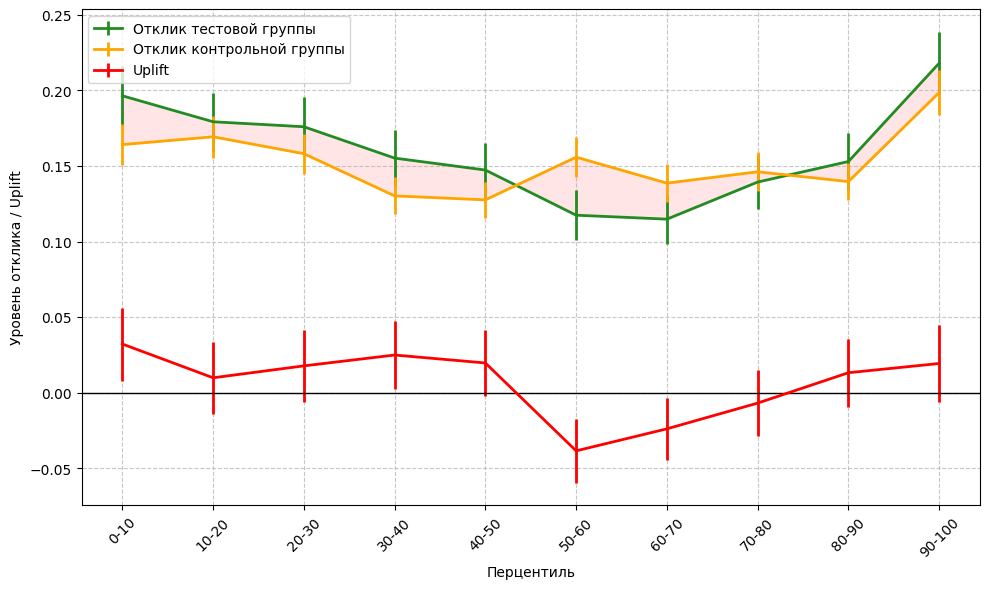

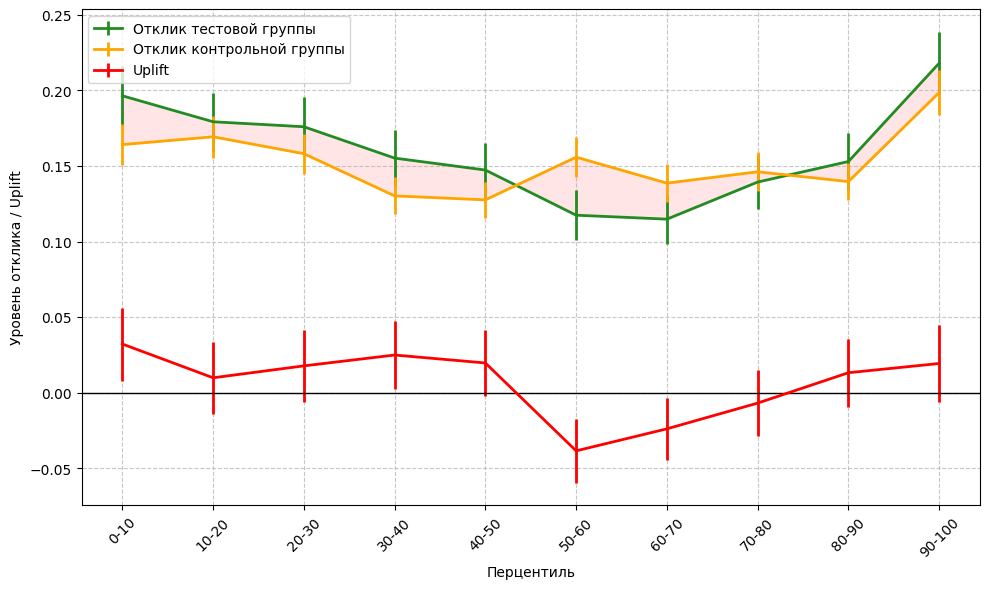

In [ ]:
uplift_df = custom_uplift_by_percentile(
    y_true=test_df['target'],
    uplift=uplift_pred,
    treatment=test_df['treatment']
)

uplift_df


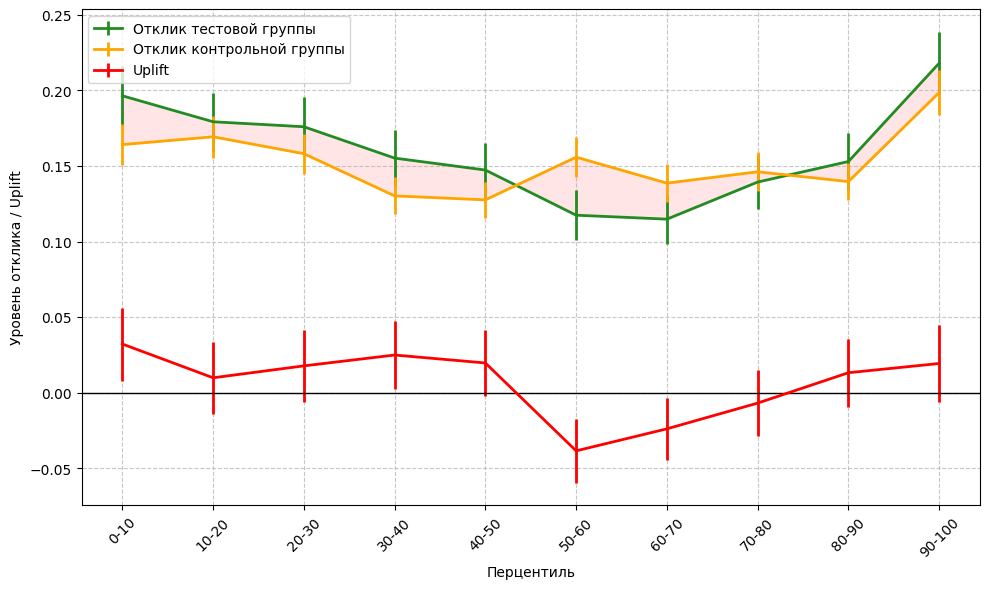

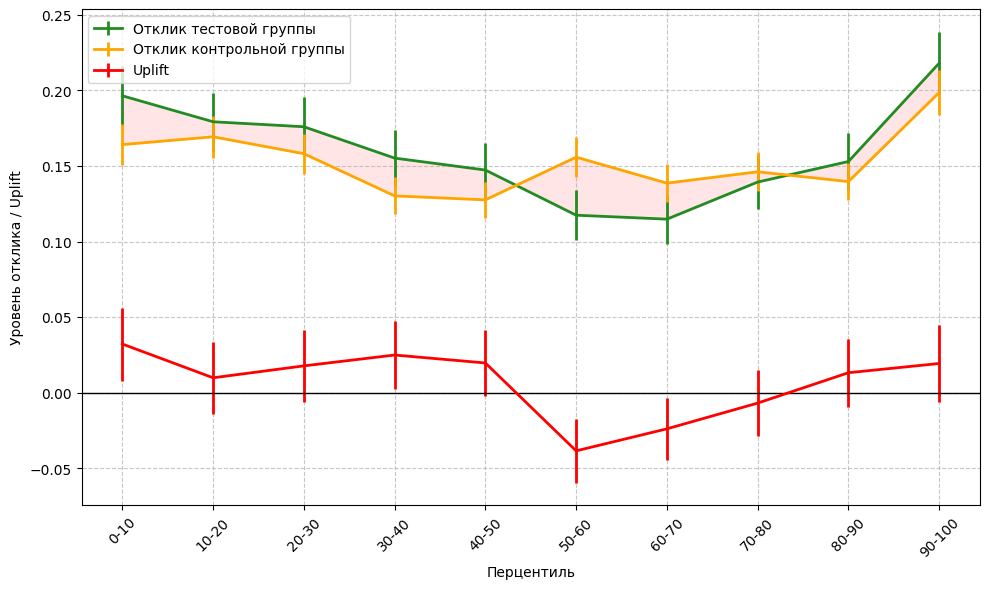

In [34]:
custom_uplift_by_percentile(
    y_true=test_df['target'],
    uplift=uplift_pred,
    treatment=test_df['treatment']
)


В данной ячейке сделайте вывод о качестве работы модели и проинтерпретируйте график `uplift by percentile` 

# Этап 3

In [ ]:
class UpliftModelInference:
    """
    Класс для инференса uplift модели.
    """
    
    def __init__(self, model, feature_names, logger=None):
        """
        Инициализация класса.
        """
        self.model = model
        self.feature_names = feature_names
        self.logger = logger
        
        if self.logger:
            self.logger.info("Модель UpliftModel инициализирована с признаками: %s", feature_names)

    def _transform_data(self, X):
        """Преобразование данных для модели."""
        if self.logger:
            self.logger.debug("Преобразование входных данных размерности %s", X.shape)
        return X
    
    def predict(self, X):
        """Получение предсказаний uplift."""
        if X.empty:
            if self.logger:
                self.logger.error("Предоставлен пустой датафрейм")
            return None
            
        if X.isnull().any().any():
            if self.logger:
                self.logger.error("Входные данные содержат пропущенные значения")
            return [None]*len(X)
        
        missing_features = set(self.feature_names) - set(X.columns)
        if missing_features:
            if self.logger:
                self.logger.error(f"Отсутствуют признаки: {missing_features}")
            return [None]*len(X)
        
        X = self._transform_data(X)

        try:
            pred_treat = self.model['treatment'].predict_proba(X[self.feature_names])[:, 1]
            pred_ctrl = self.model['control'].predict_proba(X[self.feature_names])[:, 1]
            uplift = pred_treat - pred_ctrl
        except Exception as e:
            if self.logger:
                self.logger.error(f"Ошибка при предсказании uplift: {e}")
            return [None]*len(X)

        if self.logger:
            self.logger.info("Предсказания успешно завершены")
            
        return uplift


In [ ]:
model = UpliftModelInference(
    model={
        'treatment': model_treat,  
        'control': model_ctrl      
    },
    feature_names=X_treat.columns.tolist()
)


In [43]:
test_data = pd.DataFrame({
            'recency': [1, 2, 3],
            'history_segment': [1, 2, 3], 
            'history': [100, 200, 300],
            'mens': [1, 0, 1],
            'womens': [0, 1, 0],
            'zip_code': [1, 0, 1],
            'newbie': [0, 1, 0],
            'channel': [1, 2, 0]
        })

In [44]:
# проверка работы класса
model.predict(test_data)

array([ 0.04267994, -0.02765291, -0.06014568])